In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\Workstation X\Desktop\ICT\Case study on Unsupervised Learning\Wine_clust .csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
## Pre-processing steps

In [5]:
data.shape

(178, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [8]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# K-Means clustering

<Axes: xlabel='Alcohol', ylabel='Color_Intensity'>

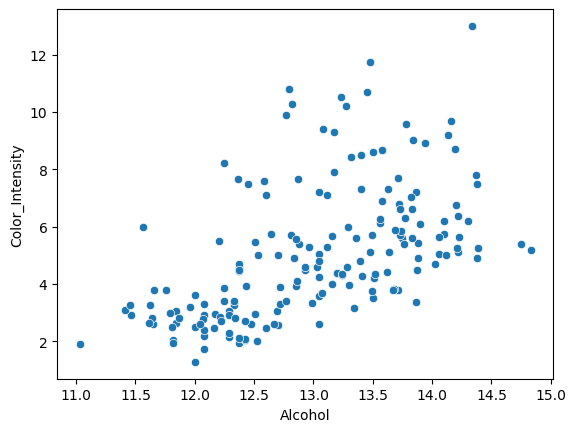

In [9]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',data=data)

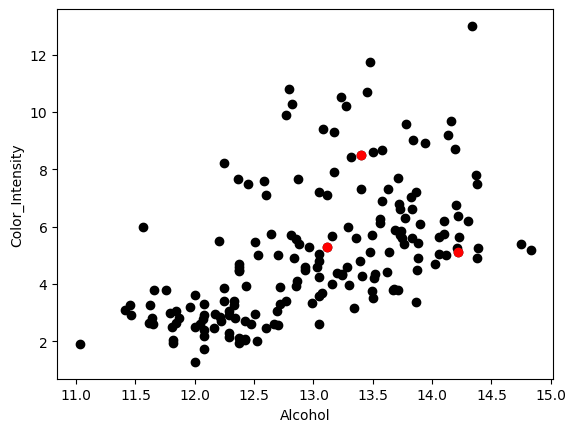

In [10]:
## Step 1 - Choose the number of clusters (k=3)
## Step 2 - Selecting random centroids for each cluster

X=data
K=3

## Select random observations as centroids

Centroids = X.sample(n=K)
plt.scatter(X['Alcohol'], X['Color_Intensity'], c='black')
plt.scatter(Centroids['Alcohol'], Centroids['Color_Intensity'], c='red')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

In [29]:
## Implement K-means Algorithm

from sklearn.cluster import KMeans

#Fit a K-means model

kmeans=KMeans(n_clusters=K, random_state=0)
X['Cluster']= kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


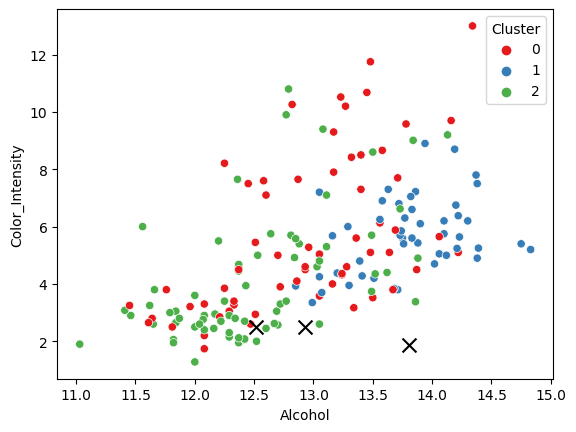

In [12]:
## Get cluster centroids

centroid=kmeans.cluster_centers_

## Plot the data points and centroids

sns.scatterplot(data=X, x='Alcohol', y='Color_Intensity', hue="Cluster", palette="Set1")
plt.scatter(x=centroid[:,0], y=centroid[:,1], c='black',marker='x',s=100)
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.show()

In [32]:
## Just printing the centroid to get an idea

centroid

array([[ 1.27935484e+01,  2.39548387e+00,  2.42000000e+00,
         2.04129032e+01,  9.68387097e+01,  2.00516129e+00,
         1.35548387e+00,  4.17741935e-01,  1.35516129e+00,
         6.04774194e+00,  8.46774194e-01,  2.13903226e+00,
         6.50225806e+02, -4.44089210e-16],
       [ 1.37882353e+01,  2.06823529e+00,  2.29823529e+00,
         1.71235294e+01,  1.05764706e+02,  2.78176471e+00,
         2.85058824e+00,  2.70000000e-01,  1.81882353e+00,
         4.98294118e+00,  1.04705882e+00,  3.31529412e+00,
         1.03176471e+03,  1.00000000e+00],
       [ 1.23382353e+01,  2.39117647e+00,  2.22352941e+00,
         2.05294118e+01,  9.01764706e+01,  2.33823529e+00,
         2.25823529e+00,  3.54117647e-01,  1.59470588e+00,
         2.79470588e+00,  9.69411765e-01,  2.95411765e+00,
         3.47705882e+02,  2.00000000e+00],
       [ 1.41366667e+01,  1.83166667e+00,  2.41166667e+00,
         1.62666667e+01,  1.07666667e+02,  3.25500000e+00,
         3.49333333e+00,  2.71666667e-01,  2.

In [13]:
## Get the inertia (within-cluster sum of squares)

inertia=kmeans.inertia_

# Print the inertia
print("Inertia: ", inertia)

Inertia:  2370689.686782968


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

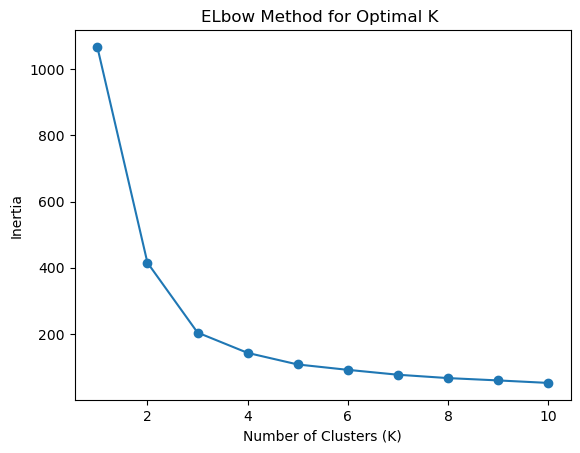

In [14]:
## Optinam K-value: Elbow Method

# Define a range of K values to test
K_range=range(1,11)
inertia_values=[]

# Calculate the inertia values for different values of K

for K in K_range:
    kmeans=KMeans(n_clusters=K, random_state =0)
    kmeans.fit(X[['Alcohol','Color_Intensity']])
    inertia=kmeans.inertia_
    inertia_values.append(inertia)
    
# Plot the inertia values
plt.plot(K_range, inertia_values, marker='o')
plt.title("ELbow Method for Optimal K ")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [15]:
## Evaluating the algorithm

# Evaluate the clustering using Silhouette Score

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X,X['Cluster'])
print("Silhouette Score is :", silhouette_avg)

Silhouette Score is : 0.5711566129967665


# Agglomerative clustering

In [21]:
data=pd.read_csv(r"C:\Users\Workstation X\Desktop\ICT\Case study on Unsupervised Learning\Wine_clust .csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


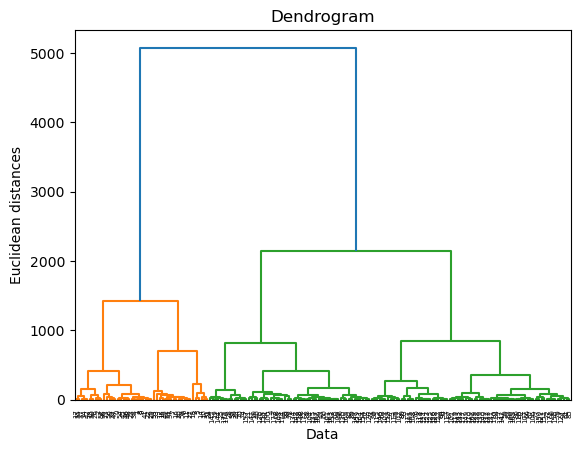

In [25]:
## Using the dendrogram to find the optimal number of clusters.

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data")
plt.xticks(rotation=90)
plt.ylabel("Euclidean distances")
plt.show()

In [ ]:
## From the dendrogram - there are 3 clusters (corresponding to 3 colours)

In [26]:
## Fitting Heirarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [35]:
print(y_hc) 
## There are 3 clusters - 0,1 and 2

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


In [ ]:
## Ward Linkage Method


In [33]:
## Converting the dataframe to numpy array

data_np=data.values

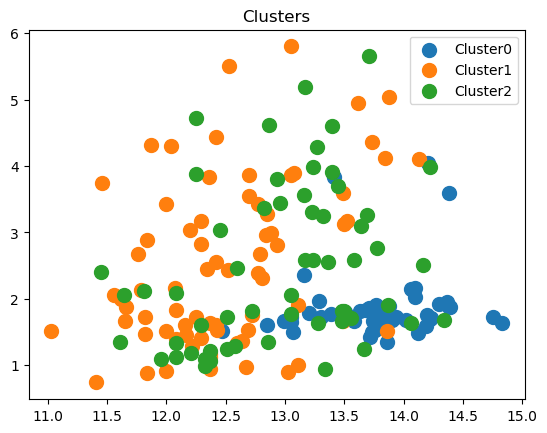

In [34]:
for cluster_label in range(3):  # Assuming 3 clusters
    plt.scatter(data_np[y_hc==cluster_label,0],data_np[y_hc==cluster_label,1],s=100,label=f'Cluster{cluster_label}')

plt.title("Clusters")
plt.legend()
plt.show()

In [37]:
## Checking with 2 columns

X=data[['Alcohol','Color_Intensity']]
X.head()

,Alcohol,Color_Intensity
0,14.23,5.64
1,13.20,4.38
2,13.16,5.68
3,14.37,7.80
4,13.24,4.32


In [38]:
from sklearn.cluster import AgglomerativeClustering

# Assuming X is your feature matrix

# Create an instance of AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')


# Fit the model to your data
clusters = agg_clustering.fit_predict(X)

# 'clusters' now contains the cluster labels for each data point
print(clusters)


[1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 2 2 1 1 1 2 1 1 1 1 2 2 1 1 2
 2 2 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 0 2 1 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [39]:
X_np=X.values

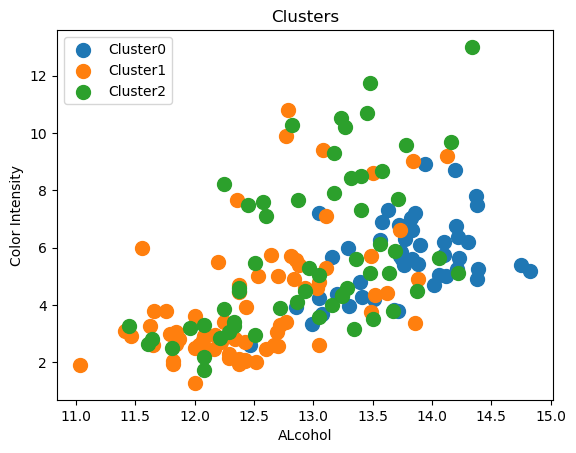

In [41]:
for cluster_label in range(3):  # Assuming 3 clusters
    plt.scatter(X_np[y_hc==cluster_label,0],X_np[y_hc==cluster_label,1],s=100,label=f'Cluster{cluster_label}')

plt.title("Clusters")
plt.xlabel("ALcohol")
plt.ylabel("Color Intensity")
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,y_hc)
print("Silhouette Score is :", silhouette_avg)

Silhouette Score is : 0.5644783284319919


# DB Scan Method

In [ ]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together 
# data points that are close to each other in a high-dimensional space. 
# It's based on the density of data points, and it can discover clusters of arbitrary shapes while distinguishing outliers.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


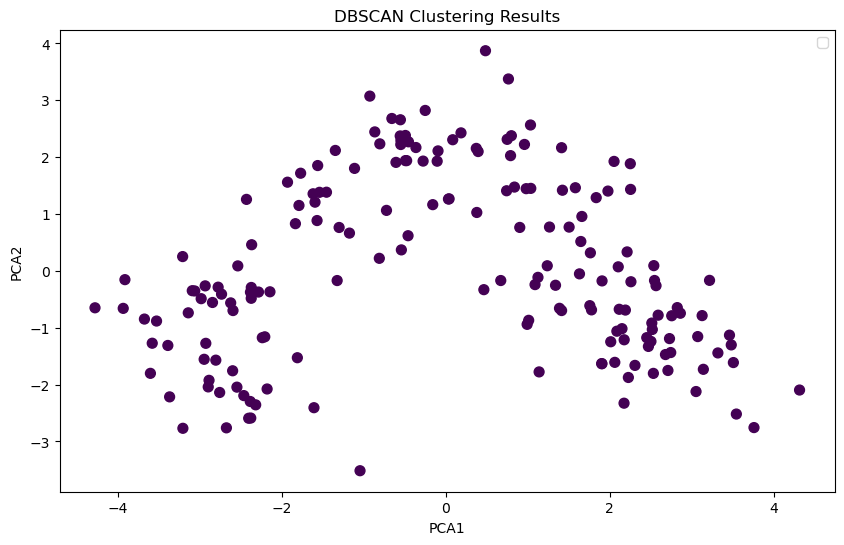

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data=pd.read_csv(r"C:\Users\Workstation X\Desktop\ICT\Case study on Unsupervised Learning\Wine_clust .csv")

# Select relevant columns
selected_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids',
                     'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

# Subset the DataFrame with selected columns
X = data[selected_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
